<a href="https://colab.research.google.com/github/Ron-Wu/deep-learning-test/blob/main/CNN_01step_face_detection_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [ ]:
# Download and unzip dataset
# 下載並解壓縮 dataset
!gdown --id 1RJ6MEDV9tYexOTAQDiWZ2bx8fO4HuUAu
!unzip -q "5celeb.zip"

Downloading...
From: https://drive.google.com/uc?id=1RJ6MEDV9tYexOTAQDiWZ2bx8fO4HuUAu
To: /content/5celeb.zip
2.73MB [00:00, 86.2MB/s]
replace __MACOSX/._5celeb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace 5celeb/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/5celeb/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# 引入需要的套件
import mtcnn
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from pprint import pprint

In [ ]:
# 第一個＊：train or val
# 第二個＊：ben_afflek, elton_john, jerry_seinfeld, madonna, mindy_kaling
# 第三個＊：所有jpg的檔名
path = './5celeb/data/*/*/*.jpg'

In [ ]:
img_paths = glob(path)
print(type(img_paths))
len(glob(path)) # 照片總數

<class 'list'>


118

In [ ]:
# create the detector, using default weights
detector = MTCNN()

[{'box': [67, 60, 52, 75],
  'confidence': 0.9990768432617188,
  'keypoints': {'left_eye': (71, 92),
                'mouth_left': (74, 120),
                'mouth_right': (88, 115),
                'nose': (72, 102),
                'right_eye': (88, 87)}}]


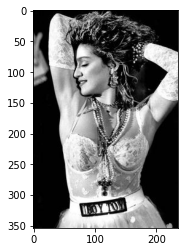

In [ ]:
img = cv2.imread(img_paths[99])[:,:,::-1] # read image，
# [:,:,::-1]:BGR & RGB 的轉換，opencv讀取進来的是bgr顺序，而imshow需要的是rgb顺序
# detect face
results = detector.detect_faces(img)
pprint(results)
plt.imshow(img)

(67, 60) (119, 135) (354, 236, 3)


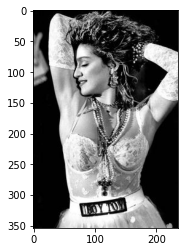

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box'] # 藉由上方印出的result得知x, y, w, h
x2, y2 = x1 + width, y1 + height
print((x1, y1), (x2, y2), img.shape)
plt.imshow(img)

(84, 113) (126, 112) (106, 134) (85, 152) (126, 151)


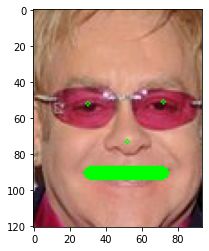

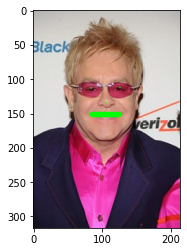

(78, 107) (133, 104) (104, 135) (76, 158) (139, 157)


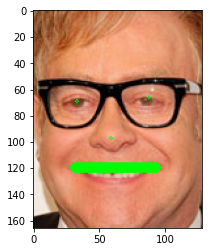

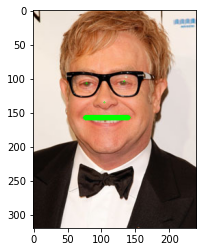

(164, 39) (185, 46) (181, 55) (161, 68) (178, 72)


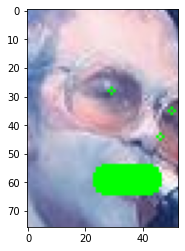

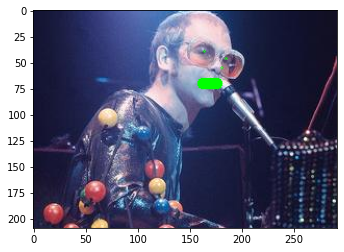

(140, 100) (170, 100) (157, 120) (141, 131) (170, 130)


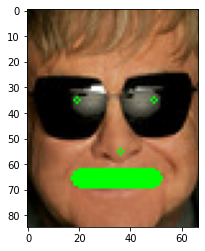

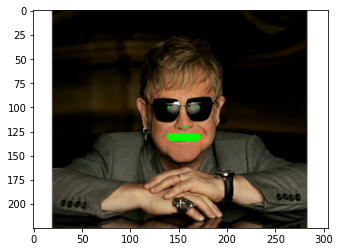

(71, 92) (88, 87) (72, 102) (74, 120) (88, 115)


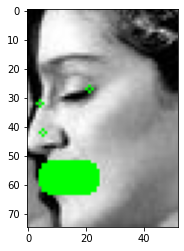

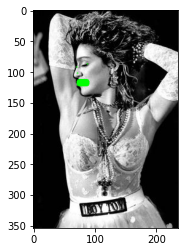

In [ ]:
for path in img_paths[95:100]:
    img = cv2.imread(path)[:,:,::-1] # read image
    # detect face
    results = detector.detect_faces(img)
    # extract the bounding box from the first face
    assert len(results) >= 1

    '''
     'keypoints': {'left_eye': (71, 92),
                'mouth_left': (74, 120),
                'mouth_right': (88, 115),
                'nose': (72, 102),
                'right_eye': (88, 87)
    '''
    left_eye = results[0]['keypoints']['left_eye']
    right_eye = results[0]['keypoints']['right_eye']
    nose = results[0]['keypoints']['nose']
    mouth_left = results[0]['keypoints']['mouth_left']
    mouth_right = results[0]['keypoints']['mouth_right']
    print(left_eye, right_eye, nose, mouth_left, mouth_right)
    point_list = [left_eye, right_eye, nose]
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    
    # draw circle
    img = cv2.circle(img, left_eye, 1, (0, 255, 0), 1)
    img = cv2.circle(img, right_eye, 1, (0, 255, 0), 1)
    img = cv2.circle(img, nose, 1, (0, 255, 0), 1)

    # draw bbox
    img = cv2.rectangle(img, mouth_left, mouth_right, (0, 255, 0), 5).get()
    # crop face
    patch = img[max(y1, 0):y2, max(x1, 0):x2]
    # show image
    plt.imshow(patch)
    plt.show()
    plt.imshow(img)
    plt.show()

54 148 61 182


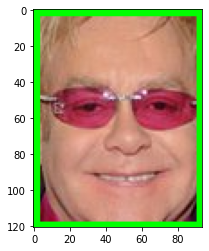

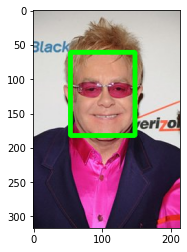

45 174 38 204


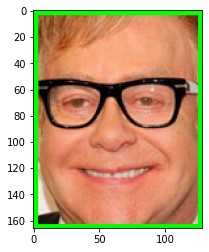

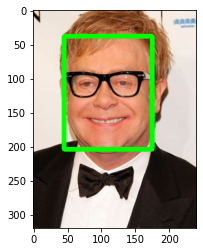

135 188 11 87


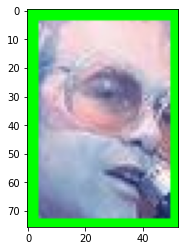

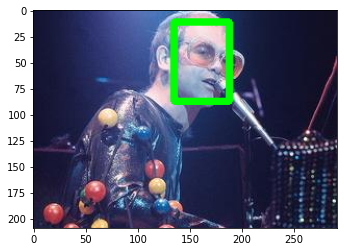

121 188 65 150


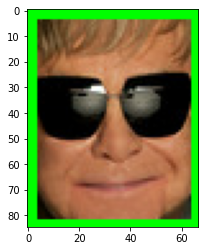

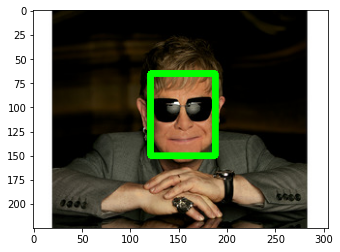

67 119 60 135


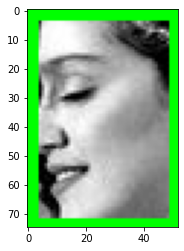

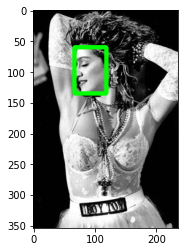

In [ ]:
for path in img_paths[95:100]:
    img = cv2.imread(path)[:,:,::-1] # read image
    # detect face
    results = detector.detect_faces(img)
    # extract the bounding box from the first face
    assert len(results) >= 1
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    print(x1, x2, y1,y2)
    # draw bbox
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5).get()
    # crop face
    patch = img[max(y1, 0):y2, max(x1, 0):x2]
    # show image
    plt.imshow(patch)
    plt.show()
    plt.imshow(img)
    plt.show()